In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt

In [2]:
df = pd.read_csv('all_data.csv', parse_dates={'date':['tweet_time','tweet_time.1','tweet_time.2']})
df

,date,Russian_Independent_Media,Russian_Propaganda_Media,Russian_Social_Media,UK_Media,US_Big_Media,US_Local_Media,US_Social_Media,Unidentified,Video_Hosting_Website
0,2009-05-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2009-08-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2009-08-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2009-10-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2009-11-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
3676,2021-03-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3677,2021-03-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3678,2021-03-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3679,2021-03-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


<Axes: xlabel='date'>

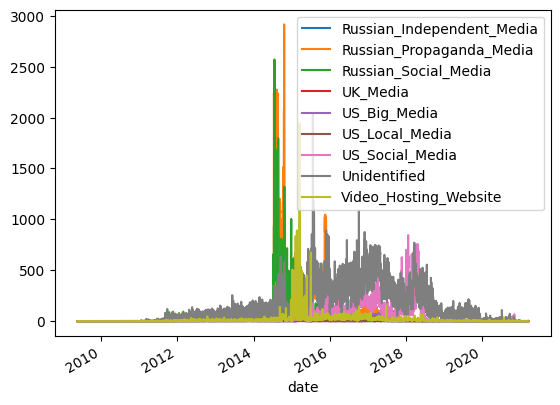

In [12]:
df.reset_index(inplace=True)
df.set_index('date', inplace=True)
df.drop(columns='index', inplace=True)
df.plot()

## Change Detection

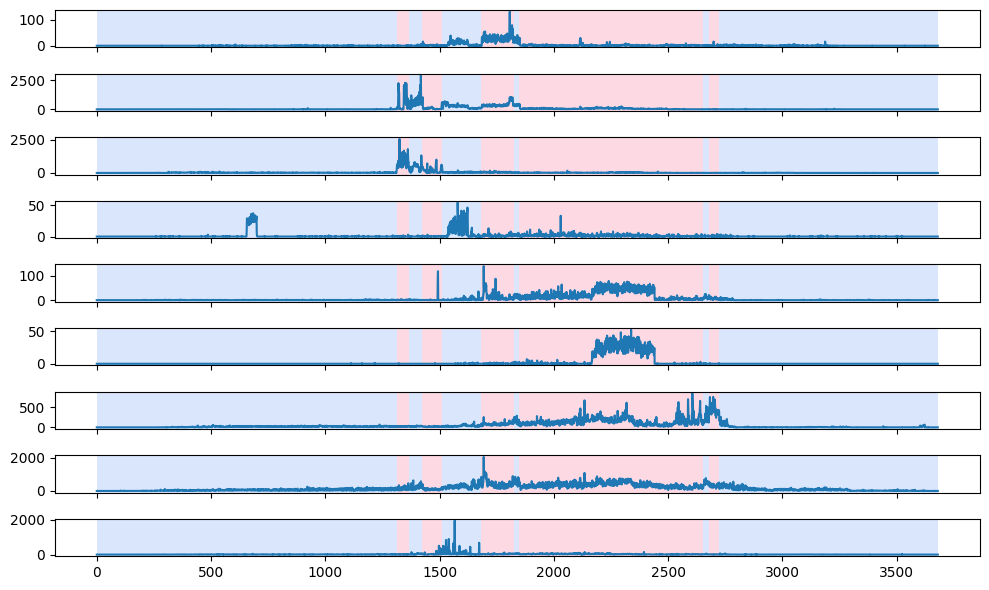

In [17]:
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(df)
my_bkps = algo.predict(n_bkps=10)

# show results
rpt.show.display(df, my_bkps, figsize=(10, 6))
plt.show()

In [14]:
my_bkps

[1315, 1365, 1425, 3681]

In [20]:
for i in my_bkps:
    df.iloc[i-1,:]

In [4]:
n, dim = 500, 3  # number of samples, dimension
n_bkps, sigma = 3, 5  # number of change points, noise standart deviation
signal, bkps = rpt.pw_constant(n, dim, n_bkps, noise_std=sigma)

In [6]:
signal.to_frame()

AttributeError: 'numpy.ndarray' object has no attribute 'to_frame'

In [73]:
df_2014 = df.reset_index()
df_2014 = df_2014[(df_2014['date'] >= '2014') & (df_2014['date'] < '2015')]
df_2014 = df_2014.set_index('date')
df_2014


,Russian_Independent_Media,Russian_Propaganda_Media,Russian_Social_Media,UK_Media,US_Big_Media,US_Local_Media,US_Social_Media,Unidentified,Video_Hosting_Website
date,,,,,,,,,
2014-01-01,0.0,0.0,15.0,0.0,0.0,0.0,15.0,16.0,0.0
2014-01-02,0.0,1.0,11.0,0.0,0.0,0.0,23.0,22.0,0.0
2014-01-03,0.0,0.0,12.0,0.0,0.0,0.0,13.0,35.0,1.0
2014-01-04,0.0,0.0,10.0,1.0,0.0,0.0,43.0,25.0,1.0
2014-01-05,0.0,1.0,7.0,0.0,0.0,0.0,21.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...
2014-12-27,0.0,19.0,913.0,1.0,0.0,0.0,28.0,75.0,202.0
2014-12-28,0.0,17.0,1004.0,0.0,0.0,0.0,27.0,62.0,77.0
2014-12-29,1.0,25.0,768.0,0.0,0.0,0.0,24.0,142.0,213.0


<Axes: xlabel='date'>

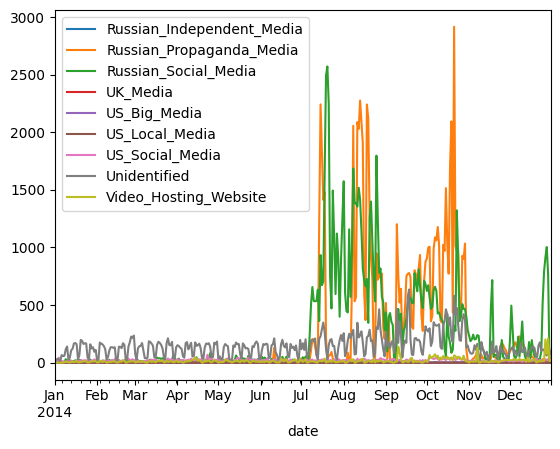

In [74]:
df_2014.plot()

### Window Slide

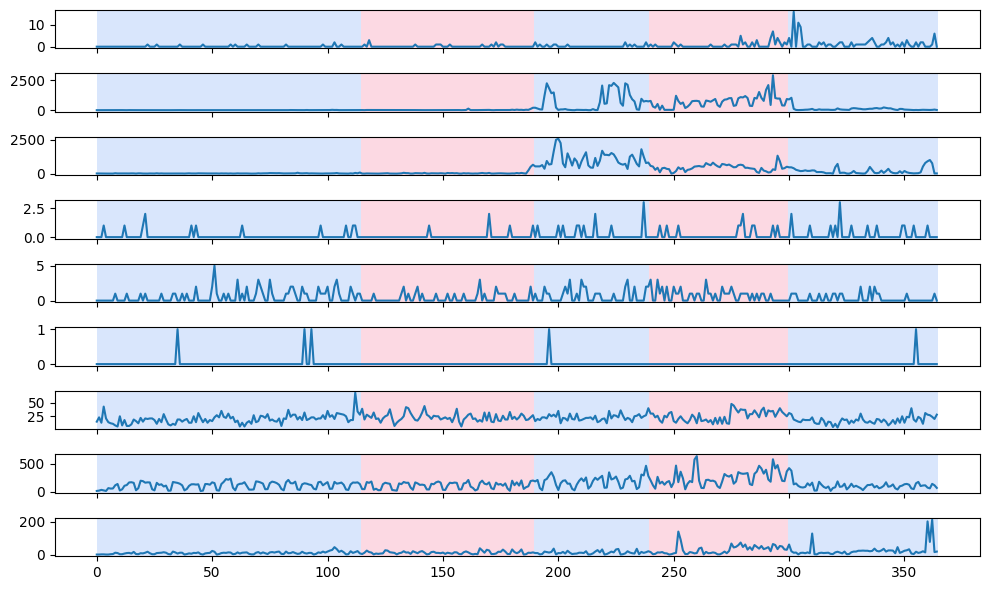

In [75]:
model = "l2" 
algo = rpt.Window(width=40, model=model).fit(df_2014)
my_bkps = algo.predict(n_bkps=4)

# show results
rpt.show.display(df_2014, my_bkps, figsize=(10, 6))
plt.show()

In [76]:
my_bkps

[115, 190, 240, 300, 365]

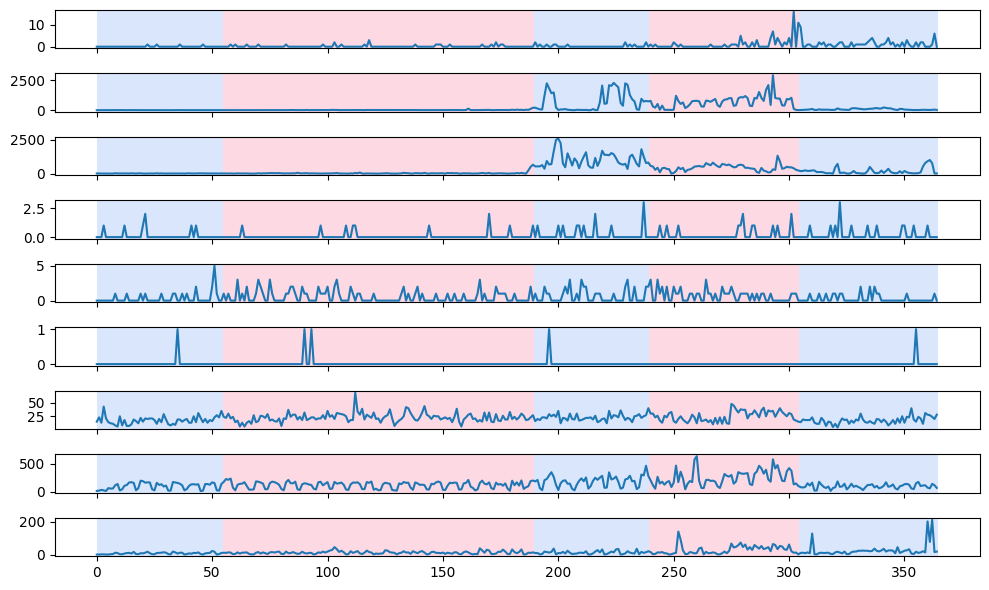

In [77]:
model = "l2" 
algo = rpt.Window(width=50, model=model).fit(df_2014)
my_bkps = algo.predict(n_bkps=4)

# show results
rpt.show.display(df_2014, my_bkps, figsize=(10, 6))
plt.show()

In [78]:
df_2014.iloc[my_bkps[:-1], :]

,Russian_Independent_Media,Russian_Propaganda_Media,Russian_Social_Media,UK_Media,US_Big_Media,US_Local_Media,US_Social_Media,Unidentified,Video_Hosting_Website
date,,,,,,,,,
2014-02-25,0.0,2.0,13.0,0.0,1.0,0.0,24.0,177.0,11.0
2014-07-10,2.0,204.0,536.0,0.0,1.0,0.0,16.0,186.0,9.0
2014-08-29,1.0,774.0,570.0,0.0,3.0,0.0,30.0,203.0,15.0
2014-11-02,9.0,11.0,187.0,0.0,0.0,0.0,14.0,83.0,10.0


<Axes: xlabel='date'>

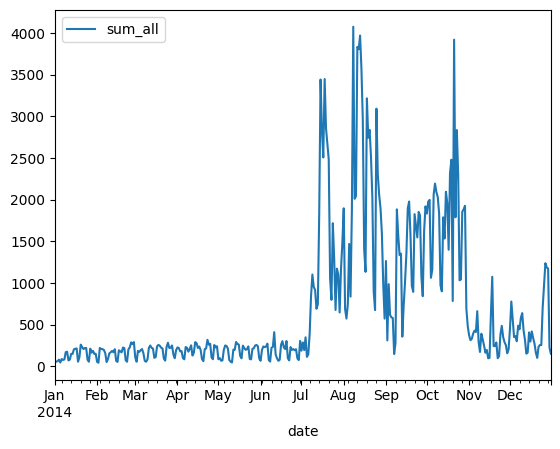

In [26]:
df_2014_sum = df_2014.copy()
df_2014_sum['sum_all'] = df_2014_sum.sum(axis=1)
df_2014_sum = df_2014_sum[['sum_all']]
df_2014_sum.plot()

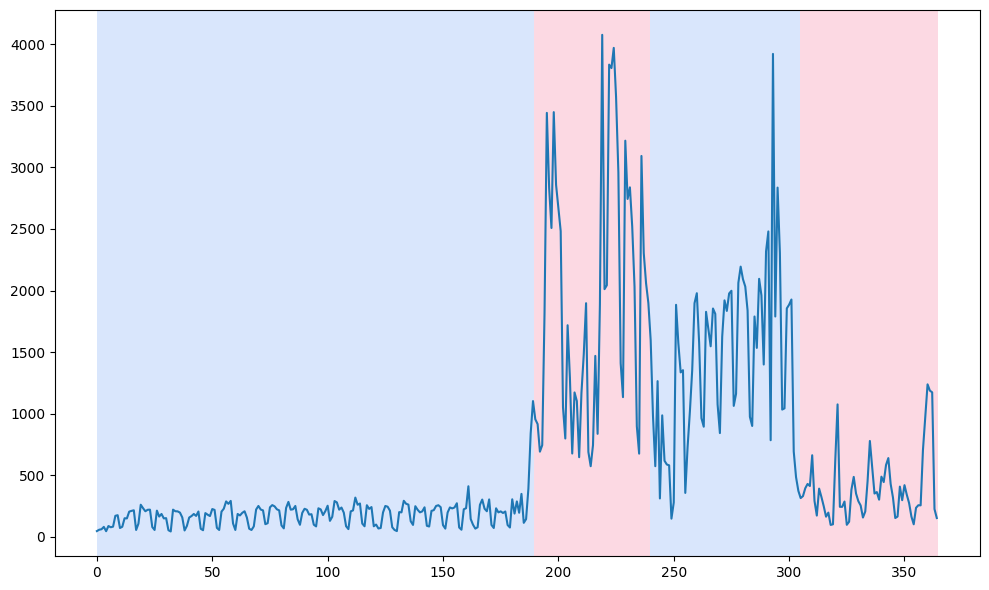

In [79]:
model = "l2"  # "l1", "rbf", "linear", "normal", "ar"
algo = rpt.Window(width=40, model=model).fit(df_2014_sum)
my_bkps = algo.predict(n_bkps=3)

# show results
rpt.show.display(df_2014_sum, my_bkps, figsize=(10, 6))
plt.show()

In [80]:
my_bkps

[190, 240, 305, 365]

In [81]:
df_2014.iloc[my_bkps[:-1],:]

,Russian_Independent_Media,Russian_Propaganda_Media,Russian_Social_Media,UK_Media,US_Big_Media,US_Local_Media,US_Social_Media,Unidentified,Video_Hosting_Website
date,,,,,,,,,
2014-07-10,2.0,204.0,536.0,0.0,1.0,0.0,16.0,186.0,9.0
2014-08-29,1.0,774.0,570.0,0.0,3.0,0.0,30.0,203.0,15.0
2014-11-02,9.0,11.0,187.0,0.0,0.0,0.0,14.0,83.0,10.0


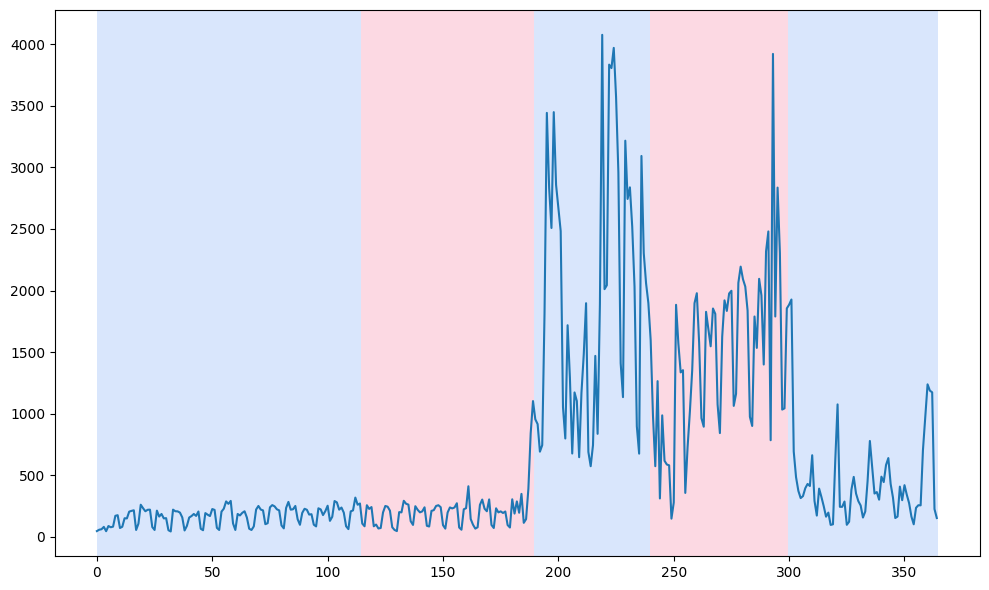

In [82]:
rpt.show.display(df_2014_sum, [115, 190, 240, 300, 365], figsize=(10, 6))
plt.show()

### Pelt

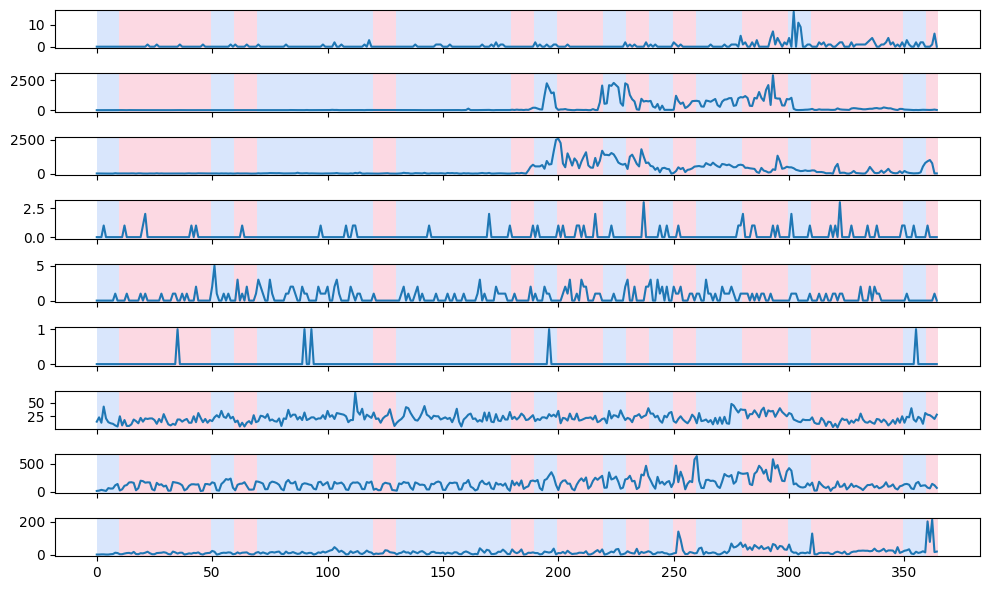

In [91]:
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=10).fit(df_2014)
my_bkps = algo.predict(pen=4)

# show results
fig, ax_arr = rpt.display(df_2014, my_bkps, figsize=(10, 6))
plt.show()

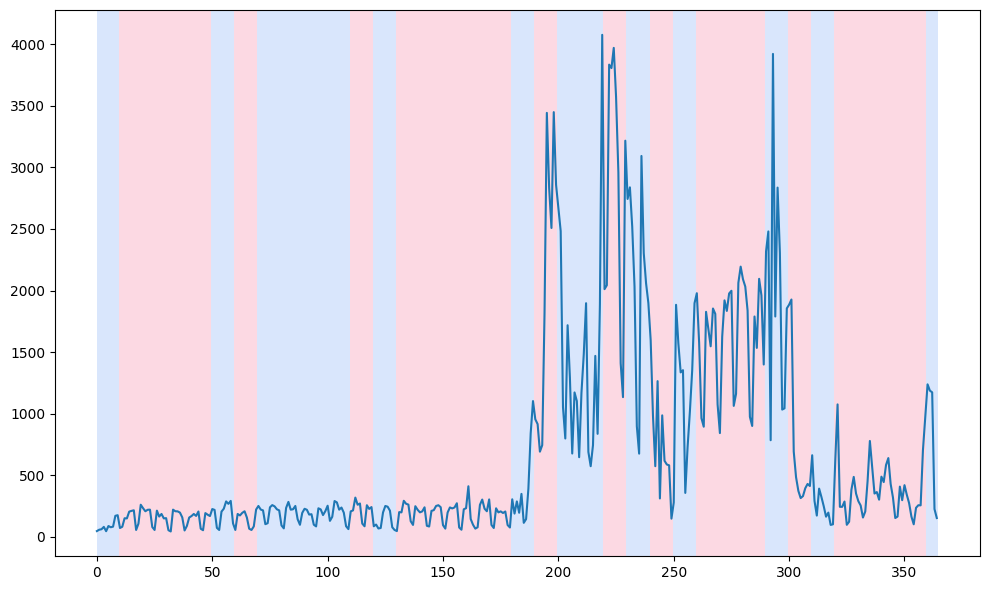

In [92]:
model = "l2"  # "l2", "rbf"
algo = rpt.Pelt(model=model, min_size=3, jump=10).fit(df_2014_sum)
my_bkps = algo.predict(pen=4)

# show results
fig, ax_arr = rpt.display(df_2014_sum, my_bkps, figsize=(10, 6))
plt.show()

### Binary Segmentation

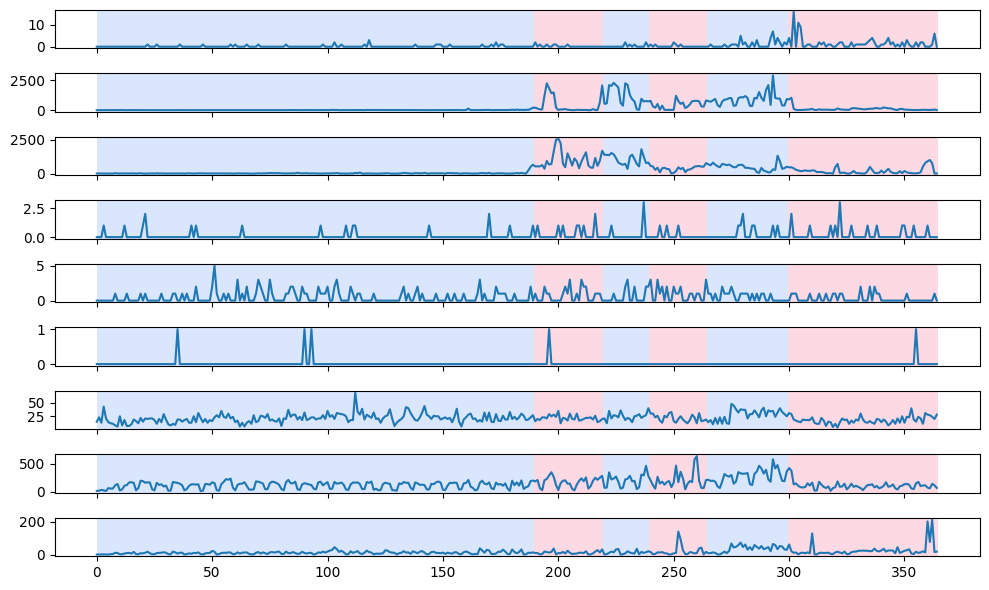

In [95]:
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(df_2014)
my_bkps = algo.predict(n_bkps=5)

# show results
rpt.show.display(df_2014, my_bkps, figsize=(10, 6))
plt.show()

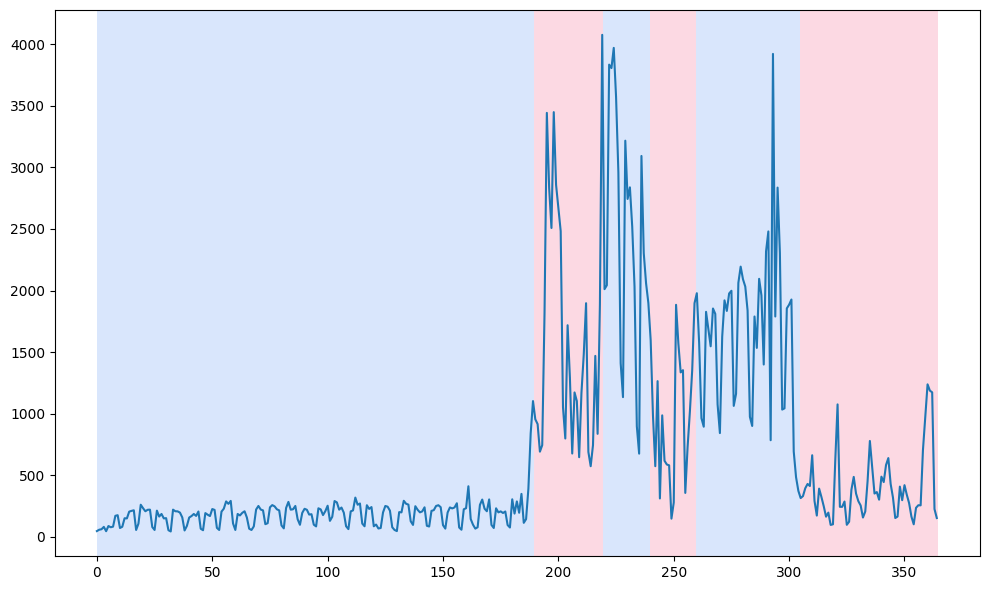

In [99]:
model = "l2"  # "l1", "rbf", "linear", "normal", "ar",...
algo = rpt.Binseg(model=model).fit(df_2014_sum)
my_bkps = algo.predict(n_bkps=5)

# show results
rpt.show.display(df_2014_sum, my_bkps, figsize=(10, 6))
plt.show()

## Monthly Data

In [31]:
df_month = pd.read_csv('all_data_month.csv', parse_dates={'date':['tweet_time','tweet_time.1']})
df_month

,date,Russian_Independent_Media,Russian_Propaganda_Media,Russian_Social_Media,UK_Media,US_Big_Media,US_Local_Media,US_Social_Media,Unidentified,Video_Hosting_Website
0,2009-05-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2009-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2009-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2009-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2009-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...
133,2020-09-01,0.0,1.0,4.0,0.0,0.0,0.0,33.0,583.0,49.0
134,2020-10-01,0.0,1.0,0.0,0.0,0.0,0.0,540.0,251.0,51.0
135,2020-11-01,1.0,0.0,0.0,0.0,2.0,0.0,164.0,98.0,23.0
136,2020-12-01,0.0,1.0,0.0,0.0,2.0,0.0,14.0,56.0,22.0


<Axes: >

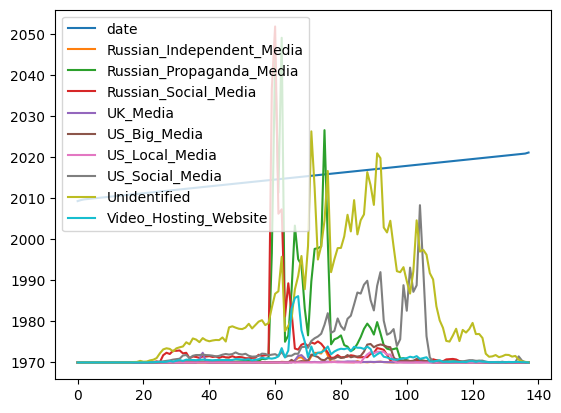

In [32]:
df_month.plot()

<Axes: xlabel='date'>

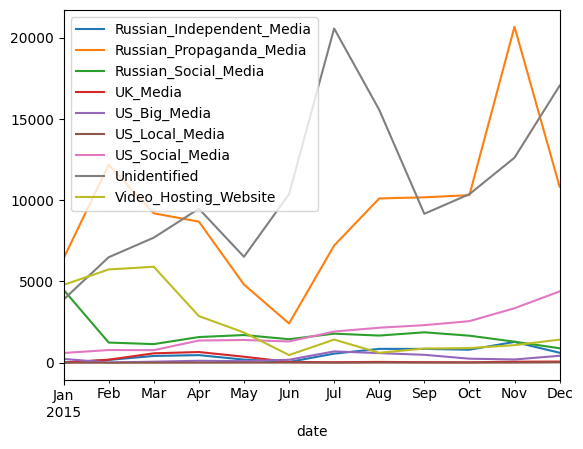

In [43]:
df_month_2014 = df_month[(df_month['date'] >= '2015') & (df_month['date'] < '2016')]
df_month_2014 = df_month_2014.set_index('date')
df_month_2014.plot()

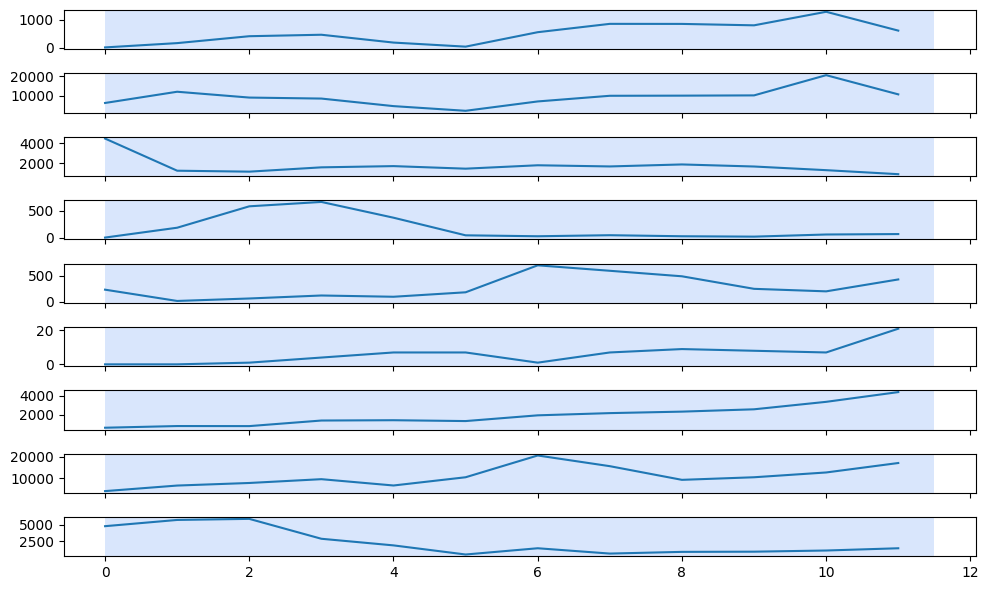

In [48]:
model = "l2" 
algo = rpt.Window(width=40, model=model).fit(df_month_2014)
my_bkps = algo.predict(n_bkps=2)

# show results
rpt.show.display(df_month_2014, my_bkps, figsize=(10, 6))
plt.show()

In [42]:
my_bkps

[12]